### LABORATORIO #7 ATAQUES A MODELOS 
##### Alfredo Quezada 191002
##### Randy Venegas

In [1]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset
tf.compat.v1.disable_eager_execution()

C:\Users\Quezada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Quezada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\art\estimators\certification\__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [16]:
#Aqui es donde cargamos el modelo que generamos del laboratorio pasado. 
vulnerable_model = tf.keras.models.load_model("modelo")

In [4]:
clasificador = KerasClassifier(
    model=vulnerable_model,
    clip_values=(min, max))

## Ataque de Evasión

In [5]:
attack_fgsm = FastGradientMethod(
    estimator=clasificador, 
    eps=0.3
    )

In [6]:
#Generamos imagenes adversariales a partir de un dataset que queremos perturbar
test_images_adv = attack_fgsm.generate(x=test_images)

C:\Users\Quezada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


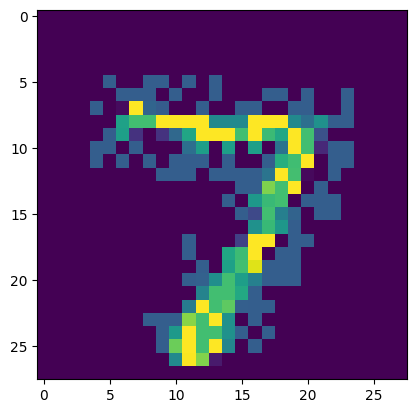

In [7]:
#Ejemplo de una perturbación
plt.imshow(X=test_images_adv[0])

In [8]:
# Evaluating the model on clean images
score_clean = vulnerable_model.evaluate(
    x=test_images, 
    y=test_labels
    )

# Evaluating the model on adversarial images
score_adv = vulnerable_model.evaluate(
    x=test_images_adv, 
    y=test_labels
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

C:\Users\Quezada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Clean test set loss: 2.31 vs adversarial set test loss: 2.30
Clean test set accuracy: 0.04 vs adversarial test set accuracy: 0.09


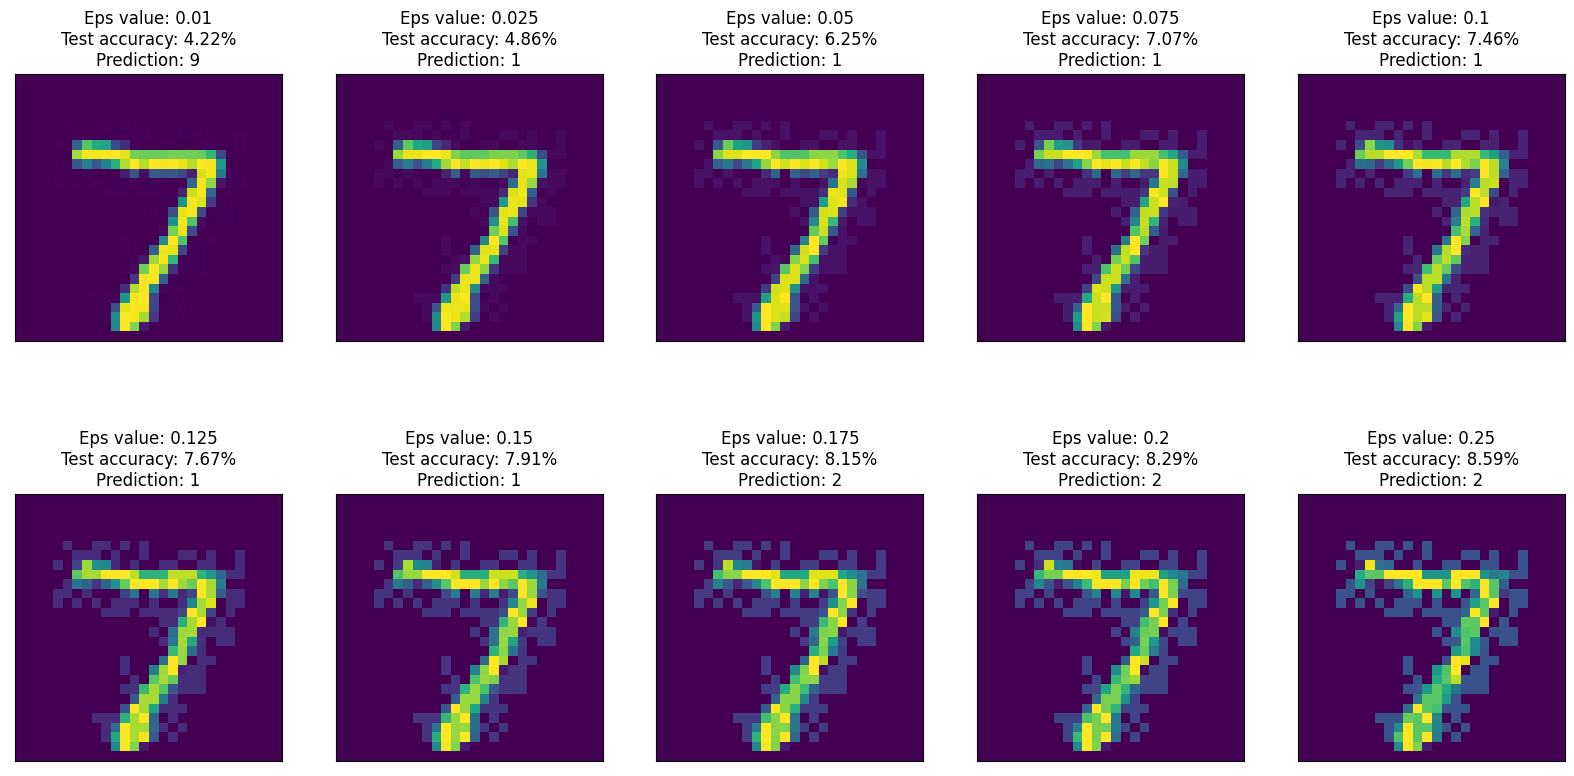

In [9]:

nrows, ncols = 2, 5


fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )


eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]


counter = 0


for i in range(nrows):
    for j in range(ncols):    
            
        attack_fgsm = FastGradientMethod(
            estimator=clasificador, 
            eps=eps_to_try[counter]
            )

        s
        test_images_adv = attack_fgsm.generate(x=test_images)

        
        axes[i, j].imshow(X=test_images_adv[0])

        
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        
        test_score = clasificador._model.evaluate(
            x=test_images_adv, 
            y=test_labels
            )[1]

        
        prediction = np.argmax(vulnerable_model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

    
        counter += 1

# Showing the plot
plt.show()

## ATAQUE MIA

In [10]:
from art.attacks.inference.model_inversion import MIFace

attack = MIFace(
    classifier=clasificador,
    max_iter=500, 
    batch_size=256)

In [11]:

y = np.arange(start=0, stop=10)
print(y)

[0 1 2 3 4 5 6 7 8 9]


In [12]:

x_init_average = np.zeros(shape=(10, 28, 28, 1)) + np.mean(a=test_images, axis=0)

In [13]:
# Running model inversion
x_infer_from_average = attack.infer(
    x=x_init_average, 
    y=y
    )

Model inversion: 100%|██████████| 1/1 [00:51<00:00, 51.73s/it]


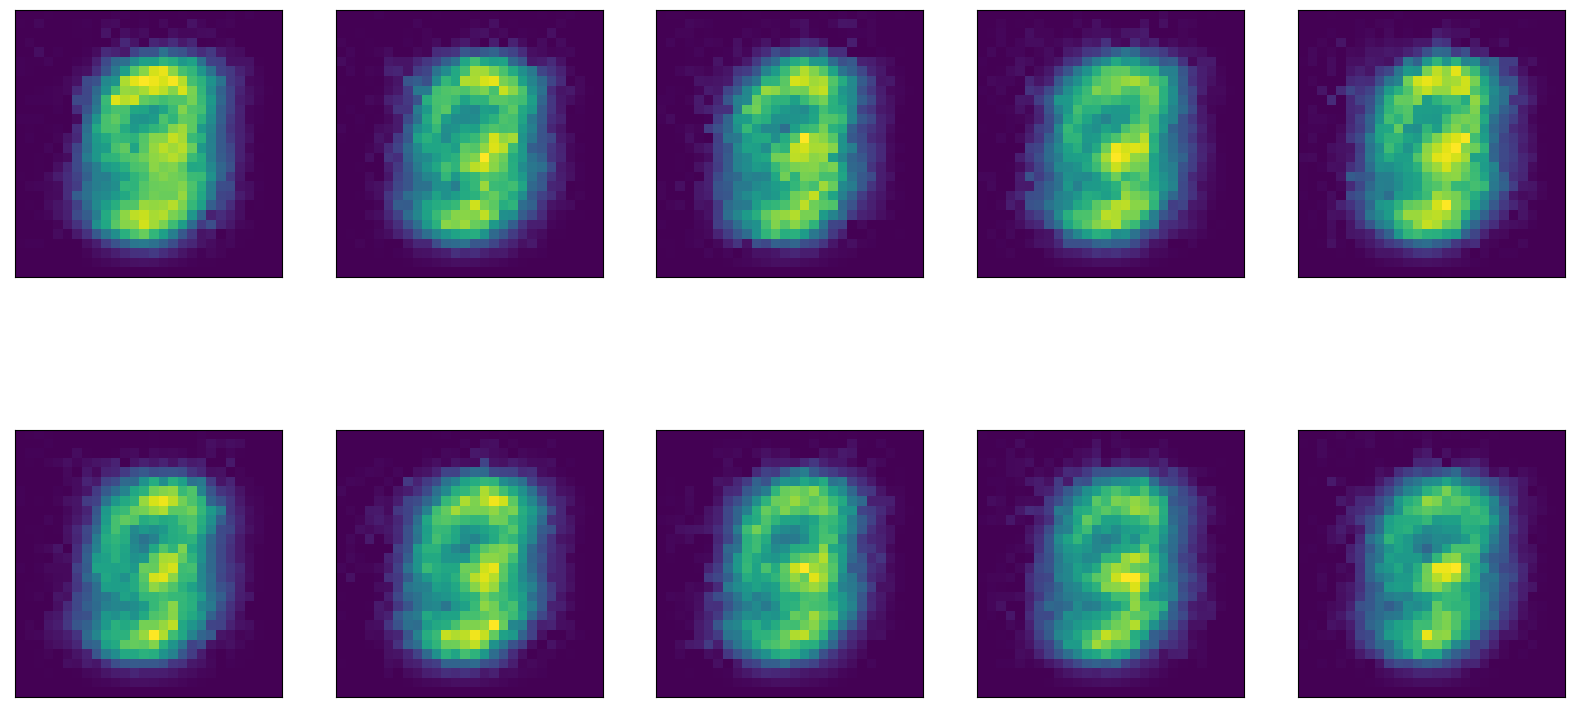

In [14]:
nrows, ncols = 2, 5

fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )


counter = 0


for i in range(nrows):
    for j in range(ncols):        
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])
        axes[i, j].imshow(X=x_infer_from_average[counter])

        
        counter += 1


plt.show()